<a href="https://colab.research.google.com/github/preshetin/digital-humanity/blob/main/Sentiment_for_Marina_Mao_Dun_Midnight_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Mao Dun Midnight text

Let's first load initial novel text

In [ ]:
# prompt: i want you to get contents of a txt file from the provided url and  put its contents to another variable named novel_text. the url is 'https://raw.githubusercontent.com/preshetin/digital-humanity/refs/heads/main/Mao-Dun-Midnight.txt'

import requests

# url = 'https://raw.githubusercontent.com/preshetin/digital-humanity/refs/heads/main/Mao-Dun-Midnight.txt'

novel_name = 'Midnight by Mao Dun'
url = 'https://raw.githubusercontent.com/preshetin/digital-humanity/refs/heads/main/output.txt'


# novel_name = 'Pride and Prejudice by Jane Austen'
# url = 'https://gutenberg.org/files/1342/1342-0.txt'

from urllib.request import urlopen

with urlopen(url) as response:
  novel_text = response.read().decode('utf-8')

# response = requests.get(url)
# response.raise_for_status()  # Raise an exception for bad status codes

# novel_text = response.text

novel_text


'THE sun had just sunk below the horizon and a gentle breeze\ncaressed one’s face. The muddy water of Soochow Creek, trans-\nformed to a golden green, flowed quietly westward. The eve-\nning tide from the Whangpoo had turned imperceptibly, and now\nthe assortment of boats along both sides of the creek were riding\nhigh, their decks some six inches above the landing-stages. Faint\nstrains of music were borne on the wind from the park across\nthe river, punctuated by the sharp, cheerful patter of kettle-\ndrums. Under a sunset-mottled sky, the towering framework\nof Garden Bridge was mantled in a gathering mist. Whenever\na tram passed over the bridge, the overhead cable suspended\nbelow the top of the steel frame threw off bright, greenish\nsparks. Looking east, one could see the warehouses on the\nwaterfront of Pootung like huge monsters crouching in the gloom,\ntheir lights twinkling like countless tiny eyes. To the west,\none saw with a shock of wonder on the roof of a building a\ngi

In [ ]:
def clean_text(text):
    """Removes line breaks and hyphenation from a text string.

    Args:
      text: The input text string.

    Returns:
      The cleaned text string.
    """
    cleaned_text = text.replace('-\n', '')
    cleaned_text = cleaned_text.replace('\n', ' ')

    return cleaned_text


In [ ]:
# prompt: I have a string of a novel. i want to analyze the sentiment of each sentence. provide basic example i can start to work with.

import nltk
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

novel_text = clean_text(novel_text)

analyzer = SentimentIntensityAnalyzer()

sentences = nltk.sent_tokenize(novel_text)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# prompt: remove first 1000 values from sentences list

# sentences = sentences[50:]


In [ ]:
# prompt: find sentence index of sentences list which contains word  'Chapter'

chapter_indices = [i for i, sentence in enumerate(sentences) if 'Chapter I' in sentence]
chapter_indices


[]

In [ ]:
# sentences = sentences[137:]

first_sentence = sentences[0]

first_sentence
# len(sentences)

'THE sun had just sunk below the horizon and a gentle breeze caressed one’s face.'

# Negative sentences

In [ ]:
# prompt: sentences = negative sentiment sentences where compound is less then -0.1

# ANSI escape codes for colors
COLORED = '\x1b[35m'
ENDC = '\033[0m'

sentences_negative = []
for sentence in sentences:
    scores = analyzer.polarity_scores(sentence)
    if scores['compound'] < -0.1:
        sentences_negative.append(sentence)
        print(f"Sentence: {COLORED}{sentence}{ENDC}")
        print(f"Sentiment Scores: {scores}")
        print("-" * 20)
        if len(sentences_negative) >= 10:
            break


Sentence: To the west, one saw with a shock of wonder on the roof of a building a gigantic neon sign in flaming red and phosphorescent green: LIGHT, HEAT, POWER.
Sentiment Scores: {'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'compound': -0.3818}
--------------------
Sentence: Passing a block west of the Shanghai Chamber of Commerce Building on the corner of North Honan Road, where the creek below was usually thronged with steam-launches plying upriver, the three cars slowed down.
Sentiment Scores: {'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.4404}
--------------------
Sentence: The driver of the first car said in a low voice to the hulking fellow sitting beside him in black silk:  “The Tai Sheng Chang Company, isn’t it, Kuan?”  “Of course it is,’ replied his companion, also in a low voice.
Sentiment Scores: {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.4939}
--------------------
Sentence: That bitch must be making you soft in the head.” As the bodyguard, for such he wa

# Positive sentences

In [ ]:

# ANSI escape codes for colors
GREEN = '\x1b[32m'
ENDC = '\033[0m'

sentences_positive = []
for sentence in sentences:
    scores = analyzer.polarity_scores(sentence)
    if scores['compound'] > 0.1:
        sentences_positive.append(sentence)
        print(f"Sentence: {GREEN}{sentence}{ENDC}")
        print(f"Sentiment Scores: {scores}")
        print("-" * 20)
        if len(sentences_positive) >= 10:
            break


Sentence: THE sun had just sunk below the horizon and a gentle breeze caressed one’s face.
Sentiment Scores: {'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
--------------------
Sentence: Faint strains of music were borne on the wind from the park across the river, punctuated by the sharp, cheerful patter of kettledrums.
Sentiment Scores: {'neg': 0.082, 'neu': 0.787, 'pos': 0.131, 'compound': 0.3182}
--------------------
Sentence: Whenever a tram passed over the bridge, the overhead cable suspended below the top of the steel frame threw off bright, greenish sparks.
Sentiment Scores: {'neg': 0.116, 'neu': 0.709, 'pos': 0.175, 'compound': 0.1531}
--------------------
Sentence: Looking east, one could see the warehouses on the waterfront of Pootung like huge monsters crouching in the gloom, their lights twinkling like countless tiny eyes.
Sentiment Scores: {'neg': 0.109, 'neu': 0.669, 'pos': 0.222, 'compound': 0.4019}
--------------------
Sentence: It was a perfect May evenin

       Chunk  Average Compound
0     1-1000          0.035722
1  1001-2000         -0.017849
2  2001-3000          0.051501
3  3001-4000          0.050072
4  4001-5000          0.076009
5  5001-6000          0.040283
6  6001-7000         -0.008766
7  7001-8000         -0.026827
8  8001-9000          0.060902
9  9001-9637          0.061148


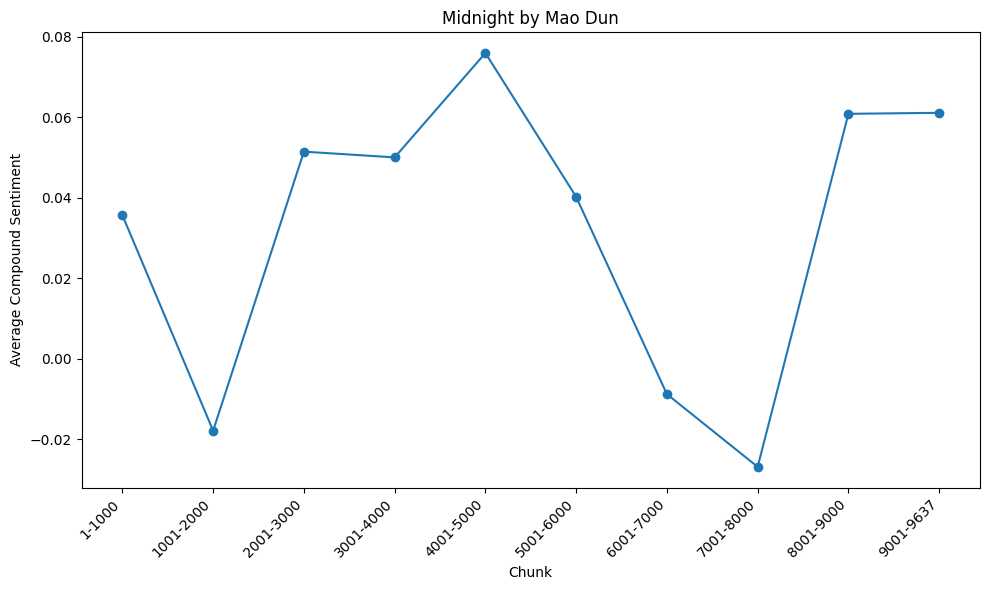

In [ ]:
# prompt: i have a list of sentences which are stings stored in 'sentences' variable. i want you to split these sentences into chunks of 500 sentences. for each chunk, calculate the mean value of sentence sentiment compound. then print a table. each row of this table is a chunk (1-500, 501-1000, etc.).  and column should have average compound value. also, draw a line chart that shows average compound dynamics from chunk to chunk.

import pandas as pd
import matplotlib.pyplot as plt

chunk_size = 1000
avg_compounds = []

for i in range(0, len(sentences), chunk_size):
  chunk = sentences[i:i + chunk_size]
  compound_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in chunk]
  avg_compound = sum(compound_scores) / len(compound_scores) if compound_scores else 0
  avg_compounds.append(avg_compound)

df = pd.DataFrame({'Chunk': [f'{i+1}-{min(i+chunk_size, len(sentences))}' for i in range(0, len(sentences), chunk_size)],
                   'Average Compound': avg_compounds})

print(df)



plt.figure(figsize=(10, 6))
plt.plot(df['Chunk'], df['Average Compound'], marker='o')
plt.xlabel('Chunk')
plt.ylabel('Average Compound Sentiment')
plt.title(novel_name)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# prompt: i have a 'sentence' variable which is a list of sentences. i want you to create list of indexes based on another block of text. each line of that block of text is contained in of of sentences in the 'sentences' list.
# <block-of-text>
# THE sun had just sunk below
# ABOUT five o’clock next morning
# IT was two o'clock in the afternoon
# ON the afternoon of Old Mr. Wu’s funeral, in the tovn of
# Two days later, the Shanghai newspapers reported
# FAN Po-wen and Lin Pei-shan were sitting together on a red
# THREE days later. All the morning not a breath
# T HE last-minute rise in government-issue quotations had taken
# THE next day was the anniversary of the famous “May Thir-
# AT length, the Dragon-boat Festival came and went
# It was nine o'clock in the morning, and half a gale
# Wu Sun-fu’s careless smile was fading and giving
# T HERE had been no lightning yet
# W HEN the night of storm had passed, daybreak brought a gentle
# NEXT morning, the sky was hidden by a white mist
# It was almost daylight before Chu Kuei-ying’s mother
# TiERE was no wind. Scattered white clouds hung motionless
# HUEI-FANG had shut herself in her own room
# As the clock struck nine and the clear, measured strokes on the
# </block-of-text>

import re

# Your provided block of text
text_block = """THE sun had just sunk below
ABOUT five o’clock next morning
IT was two o'clock in the afternoon
ON the afternoon of Old Mr. Wu’s funeral, in the tovn of
Two days later, the Shanghai newspapers reported
FAN Po-wen and Lin Pei-shan were sitting together on a red
THREE days later
T HE last-minute rise in government-issue quotations had taken
THE next day was the anniversary of the famous
AT length, the Dragon-boat Festival came and went
It was nine o'clock in the morning, and half a gale
Wu Sun-fu’s careless smile was fading and giving
T HERE had been no lightning yet
W HEN the night of storm had passed, daybreak brought a gentle
NEXT morning, the sky was hidden by a white mist
It was almost daylight before Chu Kuei-ying’s mother
TiERE was no wind
HUEI-FANG had shut herself in her own room
As the clock struck nine and the clear, measured strokes on the"""

lines = text_block.strip().split('\n')
chapter_start_indexes = []

for line in lines:
  # Clean up the line for more accurate matching, handling potential inconsistencies like extra spaces or different capitalization.
  cleaned_line = re.sub(r'\s+', ' ', line).strip().lower()
  for i, sentence in enumerate(sentences):
    if cleaned_line in sentence.lower():
        chapter_start_indexes.append(i)
        break  # Move to the next line once a match is found

chapter_start_indexes


[0,
 440,
 995,
 1437,
 1967,
 2455,
 2902,
 3374,
 3958,
 4439,
 4904,
 5382,
 5869,
 6308,
 7221,
 7851,
 8289,
 8855,
 9377]

In [ ]:
# sentences[3374]
len(chapter_start_indexes)

19

       Chapter  Average Compound
0    Chapter 1          0.017240
1    Chapter 2          0.051616
2    Chapter 3          0.079976
3    Chapter 4         -0.095612
4    Chapter 5          0.069795
5    Chapter 6          0.047929
6    Chapter 7          0.018878
7    Chapter 8          0.050584
8    Chapter 9          0.117084
9   Chapter 10          0.038215
10  Chapter 11          0.050795
11  Chapter 12          0.029491
12  Chapter 13         -0.003207
13  Chapter 14         -0.022004
14  Chapter 15         -0.022949
15  Chapter 16          0.124059
16  Chapter 17          0.019193
17  Chapter 18          0.071009
18  Chapter 19          0.023505


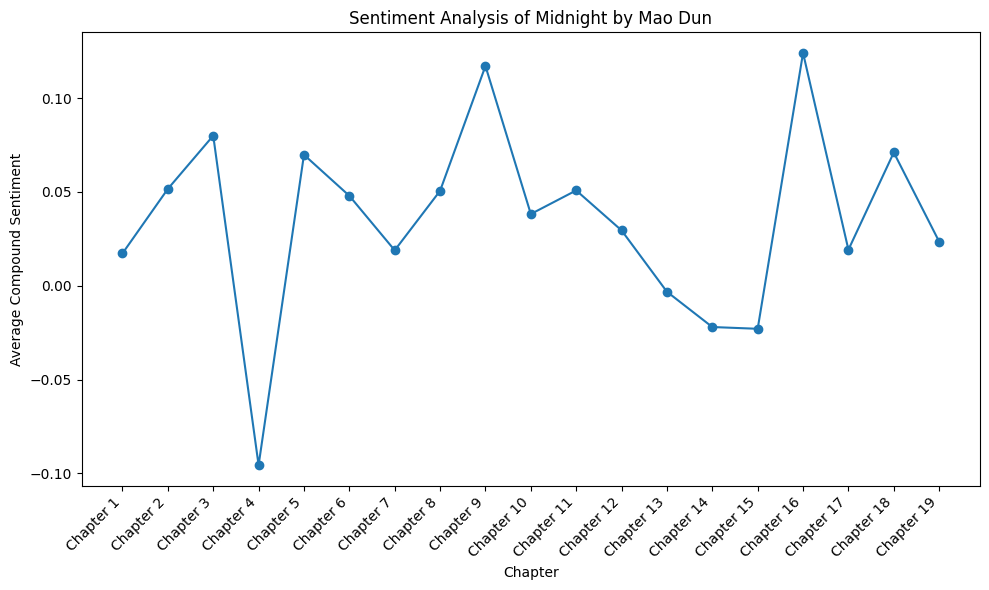

In [ ]:
# prompt: i have a list of sentences of a novel which are stings stored in 'sentences' variable.  i also have 'chapter_start_indexes' which is a list of indexes indicating the start of a new chapter. i want you to split these sentences into chunks chapter. a chunk would contain all its sentences. then, for each chunk, calculate the mean value of sentence sentiment compound. then print a table. each row of this table is a chunk (chapter 1, chapter 2, etc.).  and column should have average compound value. also, draw a line chart that shows average compound dynamics from chunk to chunk.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sentences' and 'chapter_start_indexes' are already defined

chapters = []
for i in range(len(chapter_start_indexes)):
    start = chapter_start_indexes[i]
    end = chapter_start_indexes[i+1] if i < len(chapter_start_indexes) - 1 else len(sentences)
    chapters.append(sentences[start:end])

chapter_sentiments = []
for chapter in chapters:
    compound_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in chapter]
    avg_compound = sum(compound_scores) / len(compound_scores) if compound_scores else 0
    chapter_sentiments.append(avg_compound)

df = pd.DataFrame({'Chapter': [f'Chapter {i+1}' for i in range(len(chapters))],
                   'Average Compound': chapter_sentiments})

print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['Chapter'], df['Average Compound'], marker='o')
plt.xlabel('Chapter')
plt.ylabel('Average Compound Sentiment')
plt.title(f'Sentiment Analysis of {novel_name}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Chapter 4 top negative sentences


In [ ]:
# prompt: analyze sentiment of sentences[1437:1967] list (each element of this list is a sentence of a novel). then print to the console top 100 negative sentences.

# Assuming 'sentences' list is already defined and populated from the previous code.

sentences_with_sentiment = []
for sentence in sentences[1437:1967]:
    scores = analyzer.polarity_scores(sentence)
    sentences_with_sentiment.append((sentence, scores['compound']))

# Sort sentences by compound score in ascending order (most negative first)
sentences_with_sentiment.sort(key=lambda x: x[1])

# Print the top 50 negative sentences
for sentence, score in sentences_with_sentiment[:100]:
    print(f"Sentence: {sentence}")
    print(f"Sentiment Score: {score}")
    print("-" * 20)


Sentence: Suddenly, the son’s voice broke in with an angry roar, while his wife sobbed and swore, and soon the sounds of weeping, cursing and fighting had blurred into a chaos of noise.
Sentiment Score: -0.9524
--------------------
Sentence: If he were to cause this old opium-smoker to drop dead from fright it would be a terrible crime!
Sentiment Score: -0.9422
--------------------
Sentence: In his bygone days of power and prestige he would, under similar circumstances, have given the telegraph office hell for the delay, but, as it was, he was now an old man who did not count for much and there was nothing he could do except fume and rage in silence.
Sentiment Score: -0.9032
--------------------
Sentence: Terrified by the realization that it had done something wrong, it stopped crying and took refuge in its mother’s bosom with its little mouth wide open.
Sentiment Score: -0.9022
--------------------
Sentence: “Thank God, you’re back!” came a young woman’s voice as the gate opened, but 